In [1]:
import tensorflow as tf
import tensorflow_federated as tff
import tensorflow_hub as hub
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')

Tensorflow 버전을 확인합니다: 2.5.1


In [3]:
(_train_images, train_labels), (_test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
print(f'학습에 사용할 이미지는 {len(_train_images)}개 입니다.')
print(f'학습한 후 테스트(검증)에 사용할 이미지는 {len(_test_images)}개 입니다.')

학습에 사용할 이미지는 50000개 입니다.
학습한 후 테스트(검증)에 사용할 이미지는 10000개 입니다.


In [5]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(f'데이터의 레이블은 {len(class_names)}개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.')
print('레이블 번호와 레이블: ')
for i in range(0, len(class_names)):
    print(f'{i}: {class_names[i]}')

데이터의 레이블은 10개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.
레이블 번호와 레이블: 
0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck


In [6]:
print('인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.')
print('따라서 이미지를 255로 나누어줍니다.')
train_images = _train_images / 255.0
test_images = _test_images / 255.0
print(f'기존 최소: {np.min(_train_images[0])}, 기존 최대: {np.max(_train_images[0])}')
print(f'정규화 후 최소: {np.min(train_images[0])}, 정규화 후 최대: {np.max(train_images[0])}')

인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.
따라서 이미지를 255로 나누어줍니다.
기존 최소: 0, 기존 최대: 255
정규화 후 최소: 0.0, 정규화 후 최대: 1.0


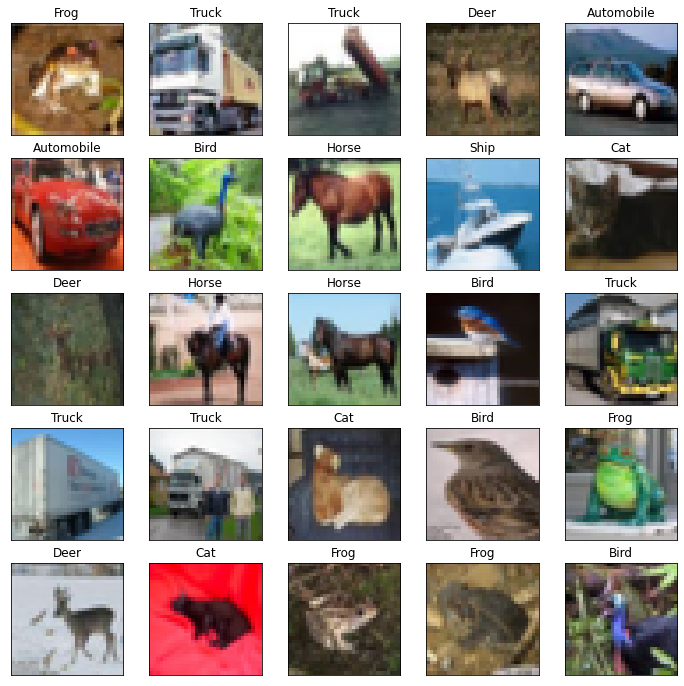

In [7]:
fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[train_labels[i][0]])

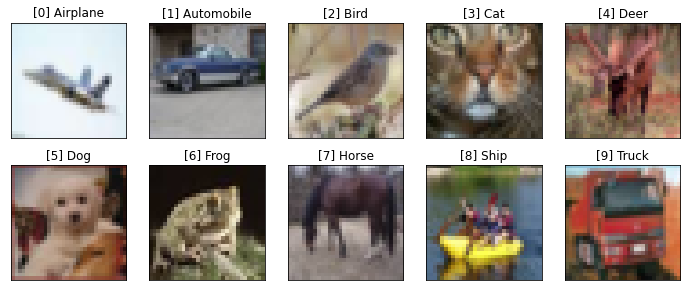

In [8]:
fig = plt.figure(figsize=(12, 12/5*2))
fig.set_facecolor('white')
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    for j in range(10000, len(train_images)):
        if train_labels[j] == i:
            break
    ax.imshow(train_images[j])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'[{train_labels[j][0]}] {class_names[train_labels[j][0]]}', fontsize=12)

In [9]:
input_shape = train_images[0].shape
print(f'데이터 상태: {input_shape}')

데이터 상태: (32, 32, 3)


In [10]:
X = []
y = []
T = 2
for a, b in zip(train_images, train_labels):
    if T < b[0]:
        continue
    X.append(a)
    y.append(b)
X = np.asarray(X)
y = np.asarray(y)
print(f'{T} 이하 데이터 셋 크기: {X.shape}, {y.shape}')
input_shape = X[0].shape

2 이하 데이터 셋 크기: (15000, 32, 32, 3), (15000, 1)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(T+1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 9219      
Total params: 9,219
Trainable params: 9,219
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs = 100
history = model.fit(X, y, 
                    epochs=epochs,
                    verbose=0)

In [14]:
model.evaluate(X, y)

469/469 [==============================] - 0s 540us/step - loss: 0.6402 - accuracy: 0.7423


[0.6401548981666565, 0.7422666549682617]

### Compare

In [15]:
import cca_core
from CKA import linear_CKA, kernel_CKA

In [16]:
X = []
y = []
T = 1

for a, b in zip(train_images, train_labels):
    if T < b[0]:
        continue
    X.append(a)
    y.append(b)
X = np.asarray(X)
y = np.asarray(y)
print(f'{T} 이하 데이터 셋 크기: {X.shape}, {y.shape}')
input_shape = X[0].shape

model_b1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(T+1)
])
model_b1.summary()
model_b1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 100
history = model_b1.fit(X, y, 
                    epochs=epochs,
                    verbose=0)
model_b1.evaluate(X, y)

1 이하 데이터 셋 크기: (10000, 32, 32, 3), (10000, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6146      
Total params: 6,146
Trainable params: 6,146
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 487us/step - loss: 0.3786 - accuracy: 0.8315


[0.3785999119281769, 0.8314999938011169]

In [17]:
X = []
y = []
T = 2

for a, b in zip(train_images, train_labels):
    if T < b[0]:
        continue
    X.append(a)
    y.append(b)
X = np.asarray(X)
y = np.asarray(y)
print(f'{T} 이하 데이터 셋 크기: {X.shape}, {y.shape}')
input_shape = X[0].shape

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(T+1)
])
model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2 이하 데이터 셋 크기: (15000, 32, 32, 3), (15000, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9219      
Total params: 9,219
Trainable params: 9,219
Non-trainable params: 0
_________________________________________________________________


In [75]:
model1.layers[1].set_weights([np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')[:-1, :], 
                              np.pad(model_b1.layers[1].get_weights()[1], (0, 1), mode='constant')])

In [76]:
epochs = 100
history = model1.fit(X, y, 
                    epochs=epochs,
                    verbose=0)
model1.evaluate(X, y)

469/469 [==============================] - 0s 507us/step - loss: 0.6486 - accuracy: 0.7424


[0.6486047506332397, 0.7423999905586243]

In [77]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(T+1)
])
model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9219      
Total params: 9,219
Trainable params: 9,219
Non-trainable params: 0
_________________________________________________________________


In [78]:
model2.layers[1].set_weights([np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')[:-1, :], 
                              np.pad(model_b1.layers[1].get_weights()[1], (0, 1), mode='constant')])

In [79]:
epochs = 100
history = model2.fit(X, y, 
                    epochs=epochs,
                    verbose=0)
model2.evaluate(X, y)

469/469 [==============================] - 0s 661us/step - loss: 0.9301 - accuracy: 0.5546


[0.9300856590270996, 0.5546000003814697]

In [72]:
np.pad(model_b1.layers[1].get_weights()[1], (0, 1))

array([-1.1505152,  1.1505154,  0.       ], dtype=float32)

In [73]:
[np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')[:-1, :], 
 np.pad(model_b1.layers[1].get_weights()[1], (0, 1), mode='constant')]

[array([[ 0.06313331, -0.02254825,  0.        ],
        [ 0.03030664,  0.02660358,  0.        ],
        [ 0.14293805, -0.12656128,  0.        ],
        ...,
        [-0.01240018,  0.03765276,  0.        ],
        [ 0.04329251,  0.00051126,  0.        ],
        [-0.06532423,  0.03664698,  0.        ]], dtype=float32),
 array([-1.1505152,  1.1505154,  0.       ], dtype=float32)]

In [ ]:
model1.layers[0].set_weights([np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')[:-1, :], 
                              np.pad(model_b1.layers[1].get_weights()[1], (0, 1), mode='constant')])

In [18]:
for i in range(0, len(model.layers)-1):
    print(model1.layers[i])

In [22]:
print(model_b1.layers[0].get_weights())
print(model_b1.layers[1].get_weights())

[]
[array([[ 0.06313331, -0.02254825],
       [ 0.03030664,  0.02660358],
       [ 0.14293805, -0.12656128],
       ...,
       [-0.01240018,  0.03765276],
       [ 0.04329251,  0.00051126],
       [-0.06532423,  0.03664698]], dtype=float32), array([-1.1505152,  1.1505154], dtype=float32)]


In [29]:
model_b1.layers[1].get_weights()[0].shape

(3072, 2)

In [39]:
model_b1.layers[1].get_weights()[0]

array([[ 0.06313331, -0.02254825],
       [ 0.03030664,  0.02660358],
       [ 0.14293805, -0.12656128],
       ...,
       [-0.01240018,  0.03765276],
       [ 0.04329251,  0.00051126],
       [-0.06532423,  0.03664698]], dtype=float32)

In [51]:
np.expand_dims(model_b1.layers[1].get_weights()[0], axis=).shape

(3072, 2, 1)

In [54]:
np.pad(model_b1.layers[1].get_weights()[0], [(0, 1)], mode='constant').shape

(3073, 3)

In [57]:
np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')

array([[ 0.06313331, -0.02254825,  0.        ],
       [ 0.03030664,  0.02660358,  0.        ],
       [ 0.14293805, -0.12656128,  0.        ],
       ...,
       [ 0.04329251,  0.00051126,  0.        ],
       [-0.06532423,  0.03664698,  0.        ],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32)

In [65]:
np.pad(model_b1.layers[1].get_weights()[0], (0, 1), mode='constant')[:-1, :].shape

(3072, 3)

In [24]:
np.expand_dims(model_b1.layers[1].get_weights(), (

[array([[ 0.06313331, -0.02254825],
        [ 0.03030664,  0.02660358],
        [ 0.14293805, -0.12656128],
        ...,
        [-0.01240018,  0.03765276],
        [ 0.04329251,  0.00051126],
        [-0.06532423,  0.03664698]], dtype=float32),
 array([-1.1505152,  1.1505154], dtype=float32)]

In [40]:
model1.layers[1].get_weights()[0].shape

(3072, 3)

In [ ]:
    if i != 0:
        for j in range(0, len(model.layers)-1):
            model.layers[j].set_weights(models[i-1].layers[j].get_weights())

In [ ]:
epochs = 100
history = model1.fit(X, y, 
                    epochs=epochs,
                    verbose=0)
model1.evaluate(X, y)

In [ ]:
print('Linear CKA: {}'.format(linear_CKA(model.layers[1].get_weights()[0], model2.layers[1].get_weights()[0])))
print('Kernel CKA: {}'.format(kernel_CKA(model.layers[1].get_weights()[0], model2.layers[1].get_weights()[0])))